# TP4, NLP

## Using Tensorflow

In [3]:
# pip install tensorflow

The differents steps are :
- load the movie datas
- vectorize the datas
- build the model
- create a validation set
- train the model
- evaluate the model

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load IMDB data (the movie datas)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess data
train_data = pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = pad_sequences(test_data, value=0, padding='post', maxlen=256)

# Prepare training and validation data
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_train = tf.cast(train_labels, 'float32')
y_test = tf.cast(test_labels, 'float32')

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Define the modified model architecture
modified_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),  # Increased the output dimension for the embedding layer
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),  # Increased the number of neurons in the Dense layer
    tf.keras.layers.Dropout(0.5),  # Added a Dropout layer for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the modified model
modified_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'Precision', 'Recall'])

# Summary of the modified model
modified_model.summary()

# Train the modified model
modified_history = modified_model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,  # Reduced the number of epochs
    batch_size=256,  # Changed the batch size
    validation_data=(x_val, y_val),
    verbose=1
)

# Define the epochs variable
epochs = range(1, len(modified_history.history['loss']) + 1)

# Evaluate the modified model
modified_loss, modified_accuracy, modified_precision, modified_recall = modified_model.evaluate(test_data, y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 global_average_pooling1d_6  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 321089 (1.22 MB)
Trainable params: 321089 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [11]:
print(f"Loss: {modified_loss}")
print(f"Accuracy: {modified_accuracy}")
print(f"Precision: {modified_precision}")
print(f"Recall: {modified_recall}")

Loss: 0.29416510462760925
Accuracy: 0.8802000284194946
Precision: 0.8725405931472778
Recall: 0.8904799818992615


### Visualisations : Validation Loss, Accuracy, Precision and Recall

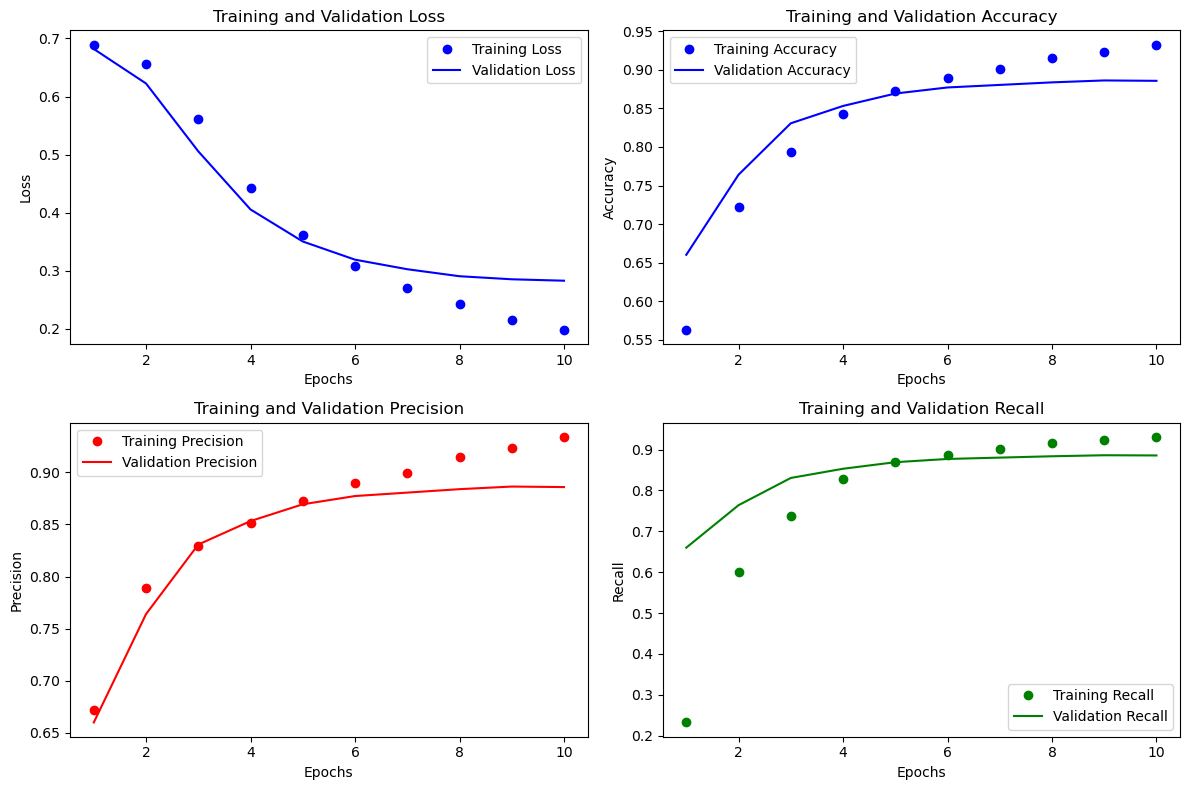

In [12]:
# Plot learning curves for the modified model
modified_loss = modified_history.history['loss']
modified_val_loss = modified_history.history['val_loss']
modified_accuracy = modified_history.history['accuracy']
modified_val_accuracy = modified_history.history['val_accuracy']
modified_precision = modified_history.history['precision']
modified_recall = modified_history.history['recall']

# Plot loss curves
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs, modified_loss, 'bo', label='Training Loss')
plt.plot(epochs, modified_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(2, 2, 2)
plt.plot(epochs, modified_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, modified_val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot precision curves
plt.subplot(2, 2, 3)
plt.plot(epochs, modified_precision, 'ro', label='Training Precision')
plt.plot(epochs, modified_val_accuracy, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot recall curves
plt.subplot(2, 2, 4)
plt.plot(epochs, modified_recall, 'go', label='Training Recall')
plt.plot(epochs, modified_val_accuracy, 'g', label='Validation Recall')  # Corrected this line
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()


plt.tight_layout()
plt.show()

### Courbe de rappel de validation

In [13]:
# Si le modèle calcule le rappel pour la validation
modified_val_recall = modified_history.history['val_recall']

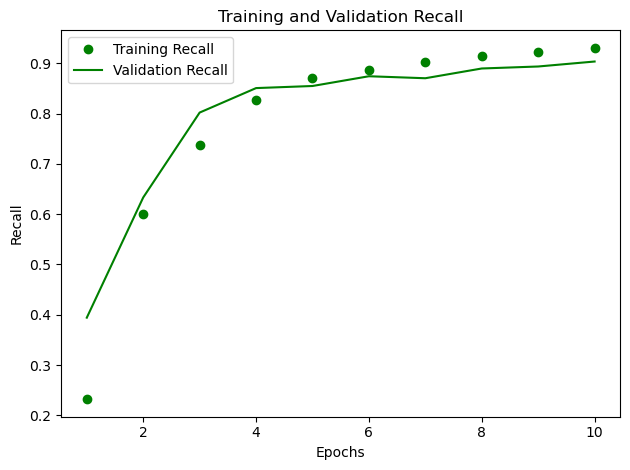

In [14]:
# Plot recall curves
plt.plot(epochs, modified_recall, 'go', label='Training Recall')
plt.plot(epochs, modified_history.history['val_recall'], 'g', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()